In [2]:
# Step 1: Upload the Excel file
from google.colab import files
uploaded = files.upload()

# Step 2: Read the file
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Step 3: Convert labels to string (to avoid type mismatch)
true_labels = df['True label'].astype(str)
predicted_labels = df['Predicted label'].astype(str)

# Step 4: Calculate statistics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

# Step 5: Display results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
print("Accuracy:", accuracy)


Saving True vs Predicted.xlsx to True vs Predicted (1).xlsx
Confusion Matrix:
 [[156  98  27]
 [ 66 319  37]
 [  0   0   0]]

Classification Report:
               precision    recall  f1-score   support

         NAT       0.70      0.56      0.62       281
         WAT       0.76      0.76      0.76       422
         nan       0.00      0.00      0.00         0

    accuracy                           0.68       703
   macro avg       0.49      0.44      0.46       703
weighted avg       0.74      0.68      0.70       703

Accuracy: 0.6756756756756757


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
# Step 1: Upload the Excel file
from google.colab import files
uploaded = files.upload()

# Step 2: Read the Excel file
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Step 3: Clean and standardize labels
df['True label'] = df['True label'].astype(str).str.strip().str.upper()
df['Predicted label'] = df['Predicted label'].astype(str).str.strip().str.upper()
df['Predicted label'].replace(['NAN', ''], ['BLANK', 'BLANK'], inplace=True)

# Step 4: Define label classes
labels = ['WAT', 'NAT']
all_labels = labels + ['BLANK']

# Step 5: Initialize statistics
total_samples = len(df)
missing_preds = (df['Predicted label'] == 'BLANK').sum()
correct_preds = (df['True label'] == df['Predicted label']).sum()
incorrect_preds = total_samples - correct_preds - missing_preds

# Step 6: Print overall stats
print("Overall Statistics:\n")
print(f"    Total Samples: {total_samples}")
print(f"    Correct Predictions: {correct_preds}")
print(f"    Incorrect Predictions: {incorrect_preds}")
print(f"    Missing Predictions (Blank): {missing_preds}\n")

# Step 7: Per-label breakdown
print("Breakdown by True Label:\n")
for label in labels:
    subset = df[df['True label'] == label]
    total = len(subset)
    correct = (subset['Predicted label'] == label).sum()
    incorrect = total - correct - (subset['Predicted label'] == 'BLANK').sum()
    missing = (subset['Predicted label'] == 'BLANK').sum()

    print(f"    {label} (True Label):\n")
    print(f"        Total: {total}")
    print(f"        Correctly Predicted as {label}: {correct}")

    for other_label in all_labels:
        if other_label != label:
            count = (subset['Predicted label'] == other_label).sum()
            print(f"        Incorrectly Predicted as {other_label}: {count}")
    print()

# Step 8: Accuracy stats
wat_df = df[df['True label'] == 'WAT']
nat_df = df[df['True label'] == 'NAT']
wat_acc = (wat_df['True label'] == wat_df['Predicted label']).sum() / len(wat_df) * 100
nat_acc = (nat_df['True label'] == nat_df['Predicted label']).sum() / len(nat_df) * 100
overall_acc = correct_preds / total_samples * 100

print("Accuracy:\n")
print(f"    Overall Accuracy: {overall_acc:.2f}%")
print(f"    WAT Accuracy: {wat_acc:.2f}%")
print(f"    NAT Accuracy: {nat_acc:.2f}%\n")

# Step 9: Custom confusion matrix
print("Confusion Matrix:")
matrix = pd.crosstab(df['True label'], df['Predicted label'], rownames=['True'], colnames=['Predicted'], dropna=False)
matrix = matrix.reindex(index=labels, columns=all_labels, fill_value=0)
print(matrix.to_string())


Saving True vs Predicted.xlsx to True vs Predicted (4).xlsx
Overall Statistics:

    Total Samples: 703
    Correct Predictions: 475
    Incorrect Predictions: 164
    Missing Predictions (Blank): 64

Breakdown by True Label:

    WAT (True Label):

        Total: 422
        Correctly Predicted as WAT: 319
        Incorrectly Predicted as NAT: 66
        Incorrectly Predicted as BLANK: 37

    NAT (True Label):

        Total: 281
        Correctly Predicted as NAT: 156
        Incorrectly Predicted as WAT: 98
        Incorrectly Predicted as BLANK: 27

Accuracy:

    Overall Accuracy: 67.57%
    WAT Accuracy: 75.59%
    NAT Accuracy: 55.52%

Confusion Matrix:
Predicted  WAT  NAT  BLANK
True                      
WAT        319   66     37
NAT         98  156     27


<ipython-input-5-5deb9a33d123>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Predicted label'].replace(['NAN', ''], ['BLANK', 'BLANK'], inplace=True)


<ipython-input-6-49c3b657f1cd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(overall_stats.keys()), y=list(overall_stats.values()), palette='pastel')


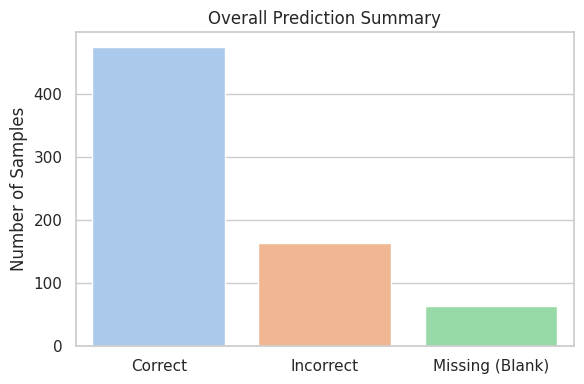

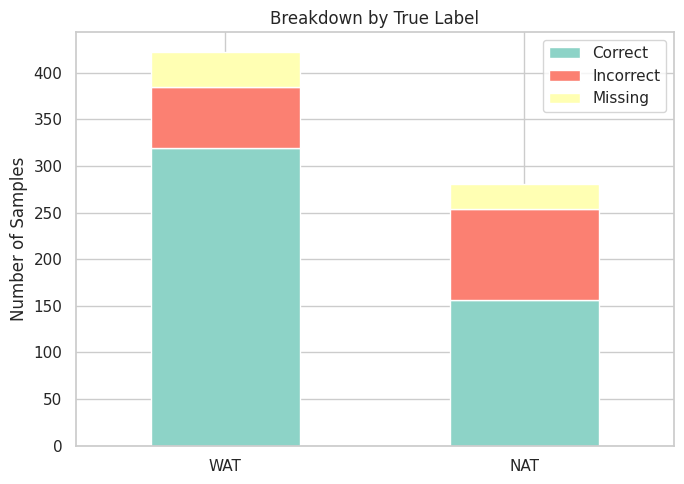

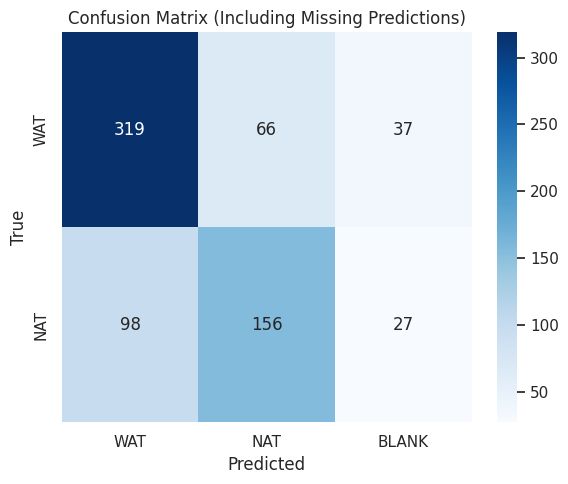

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# --- Bar plot: Overall stats ---
overall_stats = {
    'Correct': correct_preds,
    'Incorrect': incorrect_preds,
    'Missing (Blank)': missing_preds
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(overall_stats.keys()), y=list(overall_stats.values()), palette='pastel')
plt.title('Overall Prediction Summary')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

# --- Per-label breakdown ---
breakdown = {}
for label in labels:
    subset = df[df['True label'] == label]
    correct = (subset['Predicted label'] == label).sum()
    incorrect = sum([(subset['Predicted label'] == other).sum() for other in labels if other != label])
    missing = (subset['Predicted label'] == 'BLANK').sum()
    breakdown[label] = [correct, incorrect, missing]

label_df = pd.DataFrame(breakdown, index=['Correct', 'Incorrect', 'Missing']).T

label_df.plot(kind='bar', stacked=True, color=['#8dd3c7', '#fb8072', '#ffffb3'], figsize=(7,5))
plt.title('Breakdown by True Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Confusion Matrix Heatmap ---
conf_matrix_df = pd.crosstab(df['True label'], df['Predicted label'], rownames=['True'], colnames=['Predicted'], dropna=False)
conf_matrix_df = conf_matrix_df.reindex(index=labels, columns=all_labels, fill_value=0)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Including Missing Predictions)')
plt.tight_layout()
plt.show()
